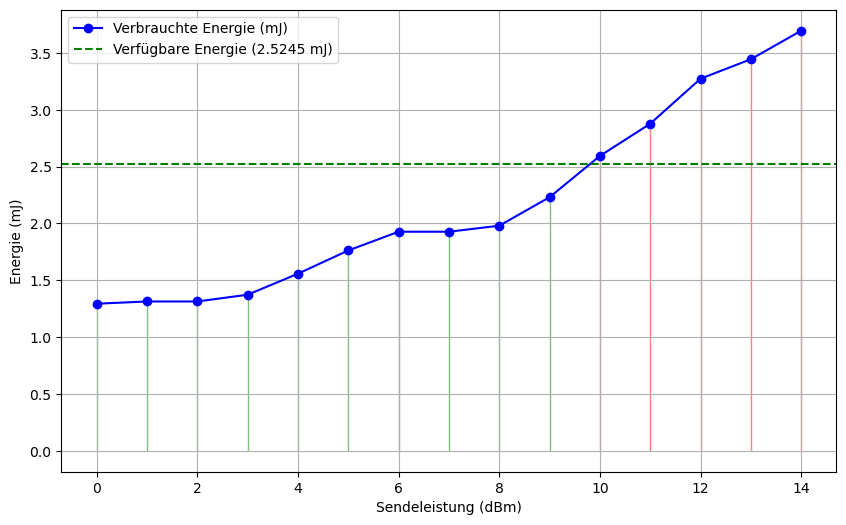

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Definieren der Daten
data = {
    'Sendeleistung (dBm)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Strom (mA)': [19.6, 19.9, 19.9, 20.8, 23.6, 26.7, 29.2, 29.2, 30, 33.8, 39.3, 43.6, 49.6, 52.2, 56],
}

# Zeit der Übertragung in Sekunden
t = 20 / 1000  # 20 ms

# Spannung
V = 3.3  # Volt

# Berechnung der verbrauchten Energie in mJ
data['Strom (A)'] = [i / 1000 for i in data['Strom (mA)']]
data['Energie (mJ)'] = [(V * i * t * 1000) for i in data['Strom (A)']]  # Umrechnung in Millijoule

# Verfügbare Energie in mJ
energie_verfuegbar_mJ = 0.0025245 * 1000  # Umrechnung in Millijoule

# Daten in einen DataFrame einfügen
df = pd.DataFrame(data)

# Erstellung des Diagramms
plt.figure(figsize=(10,6))
plt.plot(df['Sendeleistung (dBm)'], df['Energie (mJ)'], label='Verbrauchte Energie (mJ)', marker='o', color='blue')
plt.axhline(y=energie_verfuegbar_mJ, color='green', linestyle='--', label=f"Verfügbare Energie ({energie_verfuegbar_mJ:.4f} mJ)")

# Grün und Rot füllen
for i in range(len(df)):
    if df['Energie (mJ)'][i] <= energie_verfuegbar_mJ:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (mJ)'][i]], color='green', alpha=0.5)
    else:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (mJ)'][i]], color='red', alpha=0.5)

plt.xlabel('Sendeleistung (dBm)')
plt.ylabel('Energie (mJ)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


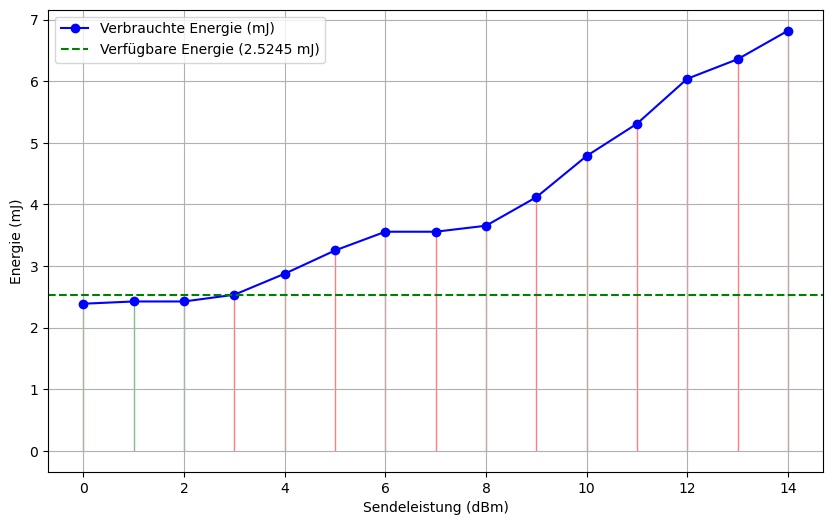

In [6]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt

# Définition des données
data = {
    'Sendeleistung (dBm)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Strom (mA)': [19.6, 19.9, 19.9, 20.8, 23.6, 26.7, 29.2, 29.2, 30, 33.8, 39.3, 43.6, 49.6, 52.2, 56],
}

# Temps de transmission en secondes
t = 36.9 / 1000  # 36,9 ms

# Tension d'alimentation
V = 3.3  # Volt

# Calcul de l'énergie consommée en millijoules
data['Strom (A)'] = [i / 1000 for i in data['Strom (mA)']]
data['Energie (mJ)'] = [(V * i * t * 1000) for i in data['Strom (A)']]  # Conversion en mJ

# Énergie disponible en mJ
energie_verfuegbar_mJ = 0.0025245 * 1000  # Conversion en millijoules

# Création du DataFrame
df = pd.DataFrame(data)

# Création du graphique
plt.figure(figsize=(10,6))
plt.plot(df['Sendeleistung (dBm)'], df['Energie (mJ)'], label='Verbrauchte Energie (mJ)', marker='o', color='blue')
plt.axhline(y=energie_verfuegbar_mJ, color='green', linestyle='--', label=f"Verfügbare Energie ({energie_verfuegbar_mJ:.4f} mJ)")

# Remplissage des zones en vert et rouge
for i in range(len(df)):
    if df['Energie (mJ)'][i] <= energie_verfuegbar_mJ:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (mJ)'][i]], color='green', alpha=0.5)
    else:
        plt.fill_between([df['Sendeleistung (dBm)'][i]], [0], [df['Energie (mJ)'][i]], color='red', alpha=0.5)

# Ajout des labels et légende
plt.xlabel('Sendeleistung (dBm)')
plt.ylabel('Energie (mJ)')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()


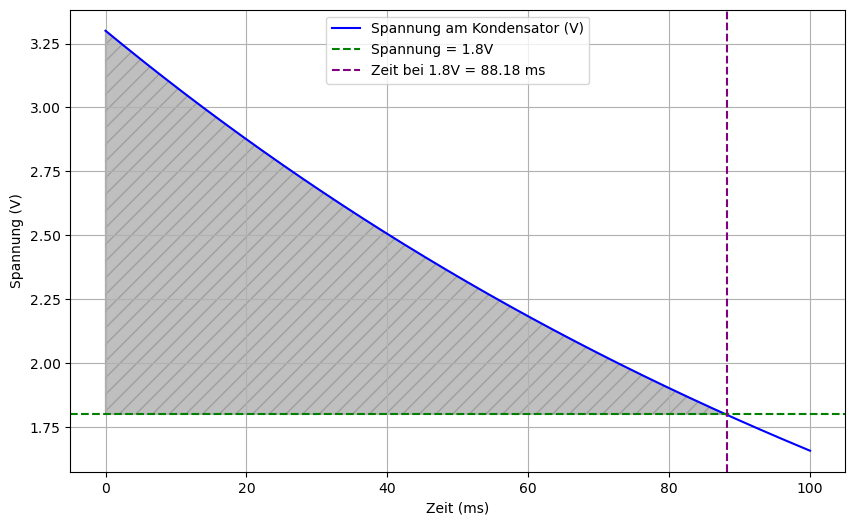

88.17635270541082

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Definition der Entladeparameter
V_initial = 3.3  # Anfangsspannung (V)
C_total = 660e-6  # Gesamtkapazität (F)
R_typical = 220  # Typischer Widerstand (Ohm)
tau_typical = R_typical * C_total  # Zeitkonstante

# Erzeugung der Zeitwerte für die Simulation (in Millisekunden umgerechnet)
t = np.linspace(0, 100, 500)  # Angepasstes Intervall für die schnelle Entladung (in ms)
V_t = V_initial * np.exp(-t / (tau_typical * 1000))  # Entladekurve (angepasst)

# Bestimmung der Zeit, bei der die Spannung 1.8V erreicht
t_target_index = np.argmax(V_t <= 1.8)  # Erstes Auftreten einer Spannung unter 1.8V
t_target = t[t_target_index]  # Entsprechende Zeit in Millisekunden

# Zeichnen der Entladekurve mit Achse in Millisekunden
plt.figure(figsize=(10, 6))
plt.plot(t, V_t, label='Spannung am Kondensator (V)', color='blue')

# Hinzufügen einer horizontalen Linie bei 1.8V und einer vertikalen Linie bei der entsprechenden Zeit
plt.axhline(y=1.8, color='green', linestyle='--', label=f'Spannung = 1.8V')
plt.axvline(x=t_target, color='purple', linestyle='--', label=f'Zeit bei 1.8V = {t_target:.2f} ms')

# Markierung des Entladebereichs bis 1.8V
plt.fill_between(t, V_t, 1.8, where=(V_t >= 1.8), color='gray', alpha=0.5, hatch='//')

# Achsenbeschriftungen und Titel
plt.xlabel('Zeit (ms)')
plt.ylabel('Spannung (V)')

plt.grid(True)
plt.legend()

# Anzeige des Diagramms
plt.show()

# Rückgabe der Zeit, bei der 1.8V erreicht werden (in Millisekunden)
t_target


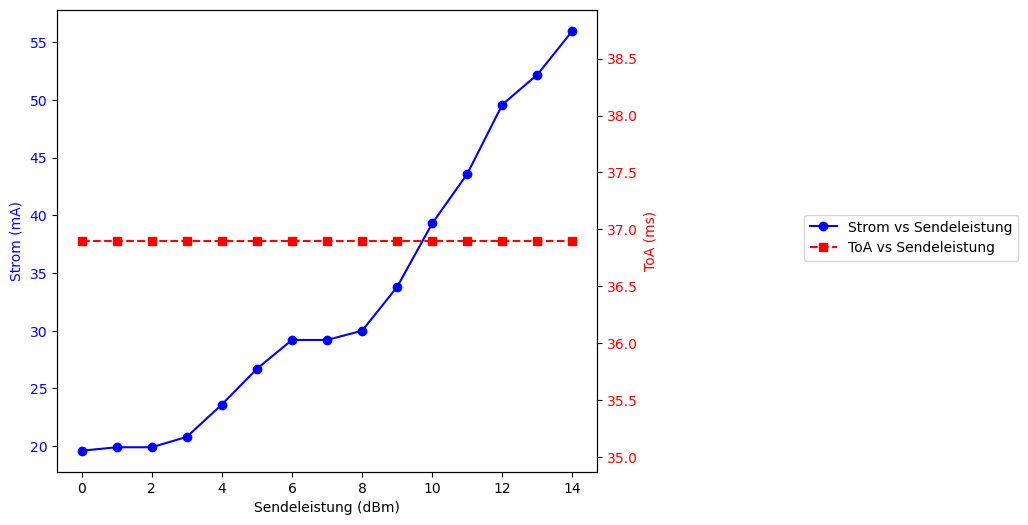

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Données
sendeleistung_dBm = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
strom_mA = np.array([19.6, 19.9, 19.9, 20.8, 23.6, 26.7, 29.2, 29.2, 30, 33.8, 39.3, 43.6, 49.6, 52.2, 56])
toa_ms = np.array([36.9] * len(sendeleistung_dBm))  # ToA constant à 36,9 ms

# Création de la figure
fig, ax1 = plt.subplots(figsize=(8, 6))

# Tracer Strom en fonction de Sendeleistung
ax1.plot(sendeleistung_dBm, strom_mA, marker='o', linestyle='-', color='b', label="Strom vs Sendeleistung")
ax1.set_xlabel('Sendeleistung (dBm)')
ax1.set_ylabel('Strom (mA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Création d'un deuxième axe pour afficher le ToA
ax2 = ax1.twinx()
ax2.plot(sendeleistung_dBm, toa_ms, marker='s', linestyle='--', color='r', label="ToA vs Sendeleistung")
ax2.set_ylabel('ToA (ms)', color='r')
ax2.tick_params(axis='y', labelcolor='r')



# Meilleure option pour un mémoire : légende à droite, alignée avec le graphique
fig.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

# Ajustement des marges pour laisser de l'espace à la légende
plt.subplots_adjust(right=0.8)

# Affichage du graphique
plt.show()


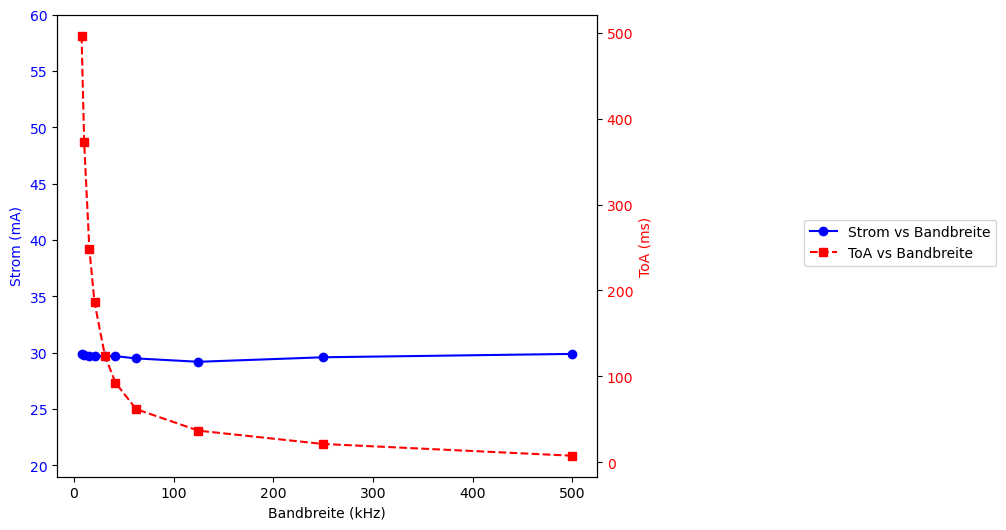

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Données
bandbreite_kHz = np.array([7.8, 10.4, 15.6, 20.8, 31.25, 41.7, 62.5, 125, 250, 500])
strom_mA = np.array([29.9, 29.8, 29.7, 29.7, 29.7, 29.7, 29.5, 29.2, 29.6, 29.9])
toa_ms = np.array([496.41, 372.31, 248.21, 186.15, 123.9, 92.85, 61.95, 36.9, 21.4, 7.74])

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Tracer Strom en fonction de Bandbreite avec une échelle similaire au graphe de Sendeleistung
ax1.plot(bandbreite_kHz, strom_mA, marker='o', linestyle='-', color='b', label="Strom vs Bandbreite")
ax1.set_xlabel('Bandbreite (kHz)')
ax1.set_ylabel('Strom (mA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(19, 60)  # Intervalle ajusté pour correspondre au graphe de Sendeleistung

# Création d'un deuxième axe pour afficher le ToA
ax2 = ax1.twinx()
ax2.plot(bandbreite_kHz, toa_ms, marker='s', linestyle='--', color='r', label="ToA vs Bandbreite")
ax2.set_ylabel('ToA (ms)', color='r')
ax2.tick_params(axis='y', labelcolor='r')



# Meilleure option pour un mémoire : légende à droite, alignée avec le graphique
fig.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

# Ajustement des marges pour laisser de l'espace à la légende
plt.subplots_adjust(right=0.8)

# Affichage du graphique
plt.show()


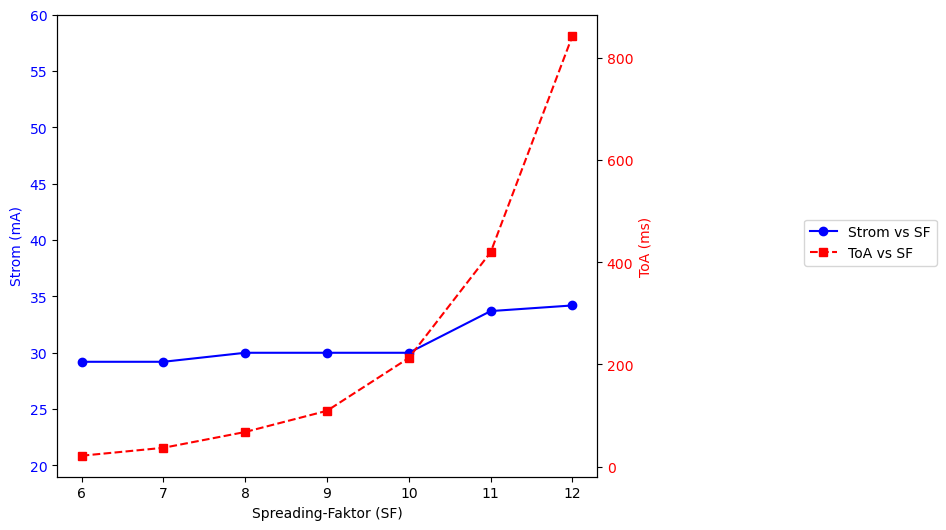

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Données
sf_values = np.array([6, 7, 8, 9, 10, 11, 12])
strom_mA = np.array([29.2, 29.2, 30, 30, 30, 33.7, 34.2])
toa_ms = np.array([21.41, 36.9, 67.87, 109.37, 212.77, 419.62, 843.31])

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Tracer Strom en fonction du Spreading Factor avec une échelle similaire au graphe de Sendeleistung
ax1.plot(sf_values, strom_mA, marker='o', linestyle='-', color='b', label="Strom vs SF")
ax1.set_xlabel('Spreading-Faktor (SF)')
ax1.set_ylabel('Strom (mA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(19, 60)  # Intervalle ajusté pour correspondre au graphe de Sendeleistung

# Création d'un deuxième axe pour afficher le ToA
ax2 = ax1.twinx()
ax2.plot(sf_values, toa_ms, marker='s', linestyle='--', color='r', label="ToA vs SF")
ax2.set_ylabel('ToA (ms)', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Meilleure option pour un mémoire : légende à droite, alignée avec le graphique
fig.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

# Ajustement des marges pour laisser de l'espace à la légende
plt.subplots_adjust(right=0.8)

# Affichage du graphique
plt.show()


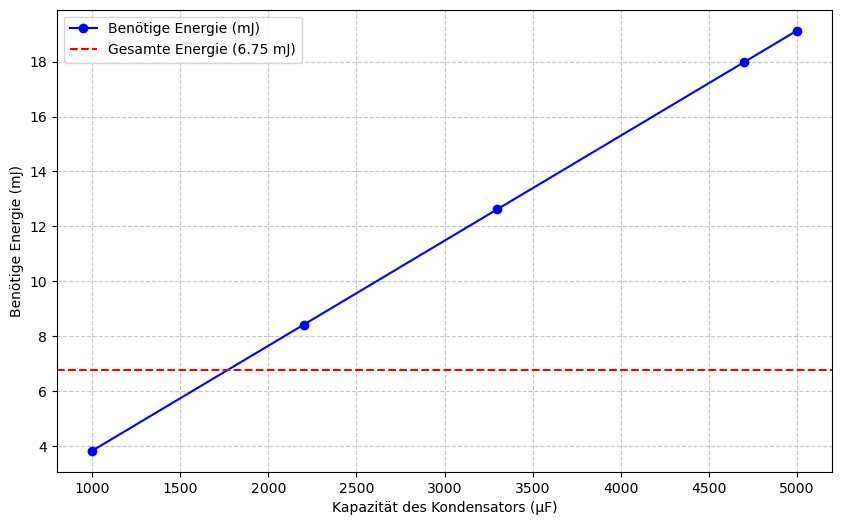

🔹 Minimale Kapazität für den Betrieb: 2200 µF


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gegebene Spannungen
V_initial = 3.3  # Anfangsspannung des Kondensators in Volt
V_final = 1.8    # Mindestspannung zur Versorgung des Systems in Volt
Betriebsspannung = 3.3  # Betriebsspannung des Systems in Volt

# Systemphasen und ihre Parameter (Dauer in Sekunden, Strom in Ampere) basierend auf dem korrigierten Tableau
phasen = {
    "Idle oder Sleep": {"zeit": 1, "strom": 5.17e-3},
    "Transmission LoRa": {"zeit": 20.2e-3, "strom": 2.97e-3},
}

# Berechnung des gesamten Energiebedarfs (E = P * t = V * I * t)
energie_mit_sleep = sum(Betriebsspannung * phase["strom"] * phase["zeit"] for phase in phasen.values())  # in Joule

# Umrechnung in Millijoule (mJ) mit korrigierter Gesamtenergie
energie_mit_sleep_mJ = 6.75  # Korrigierter Wert aus der Tabelle

# Liste der getesteten Kapazitäten (in µF)
kapazitaeten_uF = [1000, 2200, 3300, 4700, 5000]

# Berechnung der gespeicherten Energie für jede Kapazität (E = 0.5 * C * (V^2 - V_final^2))
energie_gespeichert_mJ = [(0.5 * C * 1e-6 * (V_initial**2 - V_final**2)) * 1e3 for C in kapazitaeten_uF]  # in mJ

# Bestimmung der minimalen Kapazität für den Betrieb mit der neuen Gesamtenergie
min_kapazitaet = next((C for C, E in zip(kapazitaeten_uF, energie_gespeichert_mJ) if E >= energie_mit_sleep_mJ), None)

# Diagramm zeichnen
plt.figure(figsize=(10,6))
plt.plot(kapazitaeten_uF, energie_gespeichert_mJ, marker='o', linestyle='-', color='blue', label="Benötige Energie (mJ)")

# Horizontale Linie für die gesamte Energie mit dem neuen Wert
plt.axhline(y=energie_mit_sleep_mJ, color='red', linestyle='--', label=f"Gesamte Energie ({energie_mit_sleep_mJ:.2f} mJ)")

# Diagramm-Details
plt.xlabel("Kapazität des Kondensators (µF)")
plt.ylabel("Benötige Energie (mJ)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()

# Ergebnis ausgeben
print(f"🔹 Minimale Kapazität für den Betrieb: {min_kapazitaet} µF")
